In [1]:
import pandas as pd
import numpy as np
import jedi
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import make_pipeline

# Visual libraries
import matplotlib.pyplot as plt

#Show all Columns and Rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load data set
data_churn = pd.read_csv('churn_clean.csv')

# Amend columns with no names
data_churn = data_churn.rename(columns=({ 'Item1': 'Timely_Response', 'Item2':'Timely_Fixes', 'Item3':'Timely_Replacements', 
                         'Item4':'Reliability', 'Item5':'Options', 'Item6':'Respectful_Response',
                         'Item7':'Courteous_Exchange', 'Item8':'Evidence_of_active_listening'}))

### Data Prep

In [2]:
# Dropping columns that I think are not relavant to the analysis
data_churn = data_churn.drop(columns= ["CaseOrder","Interaction", "UID", "City", "State", "Multiple","Phone",
                    "Techie","PaperlessBilling","Yearly_equip_failure","County", "Zip", "Lat", "Lng","MonthlyCharge","Email",
                    "Area", "TimeZone", "Job", "PaymentMethod", "DeviceProtection","OnlineBackup","Reliability","Marital",
                    "OnlineBackup","OnlineBackup", "OnlineBackup","Port_modem","OnlineSecurity", "Gender","Options",
                    "TechSupport","Contract","Tablet","InternetService", "StreamingTV", "StreamingMovies",
                     "Contacts","Population", "Outage_sec_perweek","Timely_Response", "Timely_Fixes", "Timely_Replacements",
                      "Respectful_Response",  "Courteous_Exchange", "Evidence_of_active_listening"
                           ])

In [3]:
data_churn.head()

,Customer_id,Children,Age,Income,Churn,Tenure,Bandwidth_GB_Year
0,K409198,0,68,28561.99,No,6.795513,904.536110
1,S120509,1,27,21704.77,Yes,1.156681,800.982766
2,K191035,4,50,9609.57,No,15.754144,2054.706961
3,D90850,1,48,18925.23,No,17.087227,2164.579412
4,K662701,0,83,40074.19,Yes,1.670972,271.493436


In [4]:
data_churn.describe()

,Children,Age,Income,Tenure,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,34.526188,3392.341550
std,2.1472,20.698882,28199.916702,26.443063,2185.294852
min,0.0000,18.000000,348.670000,1.000259,155.506715
25%,0.0000,35.000000,19224.717500,7.917694,1236.470827
50%,1.0000,53.000000,33170.605000,35.430507,3279.536903
75%,3.0000,71.000000,53246.170000,61.479795,5586.141370
max,10.0000,89.000000,258900.700000,71.999280,7158.981530


In [5]:
#drop categorical data
data = data_churn[['Children', 'Age','Income','Tenure','Bandwidth_GB_Year']]

In [6]:
# Standarized data for KMeans analysis
scaler = StandardScaler()
scaled_data_array = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data_array, columns = data.columns)
scaled_data.head()

,Children,Age,Income,Tenure,Bandwidth_GB_Year
0,-0.972338,0.720925,-0.398778,-1.048746,-1.138487
1,-0.506592,-1.259957,-0.641954,-1.262001,-1.185876
2,0.890646,-0.148730,-1.070885,-0.709940,-0.612138
3,-0.506592,-0.245359,-0.740525,-0.659524,-0.561857
4,-0.972338,1.445638,0.009478,-1.242551,-1.428184


In [7]:
# Prepared dataset in the root folder 'prepared_dataset.csv'
#scaled_data.to_csv('prepared_dataset.csv')

### Analysis

In [8]:
# Identify how many clusters are needed
ks = range(1, 10)
inertias= []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

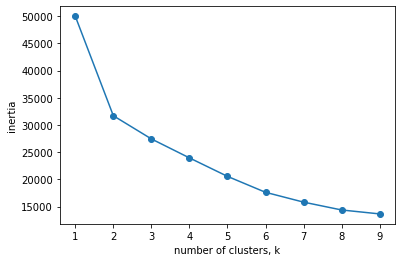

In [9]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [10]:
# Create KMeans cluster
model = KMeans(n_clusters=2)
model.fit(scaled_data)

KMeans(n_clusters=2)

In [11]:
#import numpy as np #Show all data
#np.set_printoptions(threshold=np.inf)

print('Predictions',model.labels_)

Predictions [1 1 1 ... 0 0 0]


In [12]:
# Print cluster centers
model.cluster_centers_

array([[-0.00357879,  0.01937863,  0.00248056,  0.96065982,  0.95230324],
       [ 0.00357736, -0.01937088, -0.00247957, -0.96027563, -0.9519224 ]])

In [13]:
# Adding a new column in the churn data frame containing KMeans labels
data_churn['label_'] = model.labels_
data_churn.head()

,Customer_id,Children,Age,Income,Churn,Tenure,Bandwidth_GB_Year,label_
0,K409198,0,68,28561.99,No,6.795513,904.536110,1
1,S120509,1,27,21704.77,Yes,1.156681,800.982766,1
2,K191035,4,50,9609.57,No,15.754144,2054.706961,1
3,D90850,1,48,18925.23,No,17.087227,2164.579412,1
4,K662701,0,83,40074.19,Yes,1.670972,271.493436,1


In [14]:
# Exploring if KMeans labels have correlation with Churn field
print('Number of customer clustered by KMeans to have churned:',data_churn.query('label_==1 and Churn=="Yes"').Customer_id.count())
print('Number of customer that churned from original dataset: ',data_churn.query('Churn=="Yes"').Customer_id.count())

print('Number of customer clustered by KMeans to have not churned:',data_churn.query('label_==0 and Churn=="No"').Customer_id.count())
print('Number of customer that did not churned from original dataset: ',data_churn.query('Churn=="No"').Customer_id.count())


Number of customer clustered by KMeans to have churned: 2366
Number of customer that churned from original dataset:  2650
Number of customer clustered by KMeans to have not churned: 4715
Number of customer that did not churned from original dataset:  7350


In [15]:
# Data conversion
y_actual = data_churn['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

# label_ added to the churned dataset
y_pred = data_churn['label_']

# Computing the accuracy score
print('Model Accuracy:', metrics.accuracy_score(y_actual, y_pred))

Model Accuracy: 0.7081


In [16]:
df = pd.DataFrame({'labels': y_pred, 'churn': data_churn['Churn']})

# Create cross tabulation table
ct = pd.crosstab(df['labels'],df['churn'])

# Display ct
print(ct)

churn     No   Yes
labels            
0       4715   284
1       2635  2366
